<a href="https://colab.research.google.com/github/Ste1nb0cK/Proyecto--Simulaci-n-Gas/blob/main/CodAnimaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
from ParticleClass import hello as hell
from FuncionesGeneradorasListas import FuncionesListas as fl
import matplotlib.pyplot as plt
from FGeneradora import FuncionGeneradora as fg

In [2]:
%load_ext Cython

In [3]:
%%time
%%cython 
#Se importan las cosas necesarias 
from ParticleClass import hello as hell
import timeit
from FuncionesGeneradorasListas import FuncionesListas as fl
import matplotlib.pyplot as plt
from FGeneradora import FuncionGeneradora as fg

#Parametros simulación
cdef float v1 = 50  #Velocidad mínima
cdef float v2 = 75  #Velocidad máxima
cdef float dt = 0.01 #tamaño del paso
cdef float Lx = 100 #Tamñaño de la caja 
cdef float Ly = 100 
cdef int n = 11 #número de partículas
cdef float m = 1 #masa 
cdef float r = 2 #radio
cdef int nt  = 10000 #número de pasos
cdef int j,k,i


par = fg.funcion_generadora(Lx,Ly,v1,v2,m,r,n) #se crea la configuración inicial de las partículas
lista_posiciones = fl.listas_para_llenar_posiciones(n) ## lista que contiene las posiciones de cada partícula 
                                                       ## en cada paso
lista_velocidades = fl.listas_para_llenar_componentes_velocidad(n)

for j in range(nt):

    for k in range(n):
        lista_posiciones[k][0].append(par[k].posicion[0])  #Se añade la posición en x de cada partícula
        lista_posiciones[k][1].append(par[k].posicion[1])  #Se añade la posicion en y de cada partícula
        lista_velocidades[k][0].append(par[k].velocidad[0]) #Se añade la velocidad en x de cada partícula
        lista_velocidades[k][1].append(par[k].velocidad[1]) #Se añade la velocidad en y de cada partícula
    for p in par:     
        for i in range(par.index(p)+1,n): #Revisamos las colisiones entre partículas
            if  p.posicion[0] == par[i].posicion[0] and p.posicion[1] == par[i].posicion[1]:
                continue 
            
            elif p.ver_colision_pp(par[i])  :
                #print("CHOQUE")
                p.resolver_colision_particula(par[i])
    for p in par: 
        if p.ver_colision_muro(Lx,Ly): #Revisamos las condiciones de choque con la caja
            p.resolver_colision_muro(Lx,Ly)
        elif p.ver_colision_esquina(Lx,Ly): #Revisamos las condiciones de choque con las esquinas
            p.resolver_colision_esquina()
        p.paso_dt(dt)

Wall time: 13.5 s


In [ ]:
########Creación de las imagenes########
#En principio este codigo funciona para n particulas pero debe estar definida la lista ListaOf con anterioridad

#En Gif se guardaran cada una de las imagenes 
Gif=[]
#Recuerde que debe cambiar la informacion del radio dependiendo de la simulacion creada, la cual corresponde al ultimo valor en la funcion circulo
for x in range(0,len(ListaOf[0][1])):
  for i in range(0,len(ListaOf)):
    x1,y1=circle(ListaOf[i][0][x],ListaOf[i][1][x],10)
    BoxOf[x1,y1]=2

In [ ]:
########Caso particular para 2 particulas########
#Por algun motivo luego de correr el codigo una vez se cambian los valores de las listas, por lo cual corra la celda anterior si aparece un error

#las listas l1 y l2 contienen la informacion de los radios en el tiempo de la particula 1 y 2 correspondientemente 
l1=[]
l2=[]

#Como hay posiciones menores que cero entonces lo corregi corriendo las posiciones en x
l1.append(np.array(x)+6)
l1.append(y)
l2.append(np.array(x1)+6)
l2.append(y1)

#la ListaOf contendra a l1 y l2
ListaOf=[]
ListaOf.append(l1)
ListaOf.append(l2)

#BoxOf sera la imagen en donde se mueve la particula, las dimensiones dependen del recorrido de la particula 
BoxOf=np.zeros((20,15))

########Creación de las imagenes########
#En principio este codigo funciona para n particulas pero debe estar definida la lista ListaOf con anterioridad

#En Gif se guardaran cada una de las imagenes 
Gif=[]

for x in range(0,len(ListaOf[0][1])):
  for i in range(0,len(ListaOf)):
    x1,y1=circle(ListaOf[i][0][x],ListaOf[i][1][x],1)
    BoxOf[x1,y1]=255
  Gif.append(np.copy(BoxOf))
  BoxOf=np.zeros((20,15))


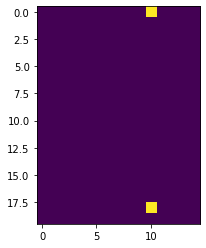

In [ ]:
########Descarga de las imagenes########
#Con esto descarga cada una de las imagenes, el archivo descomprime las imagenes en drive, por lo cual recuerde cambiar la ruta
#Las imagenes se guardan en formato png y se guardan en orden cuando son menos de 10000 imagenes

for x in range(0,len(Gif)):
  if x<10:
    plt.imshow(Gif[x])
    plt.savefig("/content/drive/MyDrive/Colab Notebooks/Proyecto /Gif3/img000{0}.png".format(x), bbox_inches='tight') 
  elif x<100:
    plt.imshow(Gif[x])
    plt.savefig("/content/drive/MyDrive/Colab Notebooks/Proyecto /Gif3/img00{0}.png".format(x), bbox_inches='tight') 
  elif x<1000:
    plt.imshow(Gif[x])
    plt.savefig("/content/drive/MyDrive/Colab Notebooks/Proyecto /Gif3/img0{0}.png".format(x), bbox_inches='tight') 
  elif x<10000:
    plt.imshow(Gif[x])
    plt.savefig("/content/drive/MyDrive/Colab Notebooks/Proyecto /Gif3/img{0}.png".format(x), bbox_inches='tight') 



In [ ]:
########Creación del Gif########

#GifOfFinal es una lista donde sus elementos son las imagenes, estoy usando una libreria que manipula documentos, por lo cual se debe cambiar la ruta 
GifOfFinal = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/Proyecto /Gif3/*.png'))  
GifOfFinal.sort() 

#Dependiendo del numero de imagenes cambio el valor de la variable fps
fps = 5
clip = mpy.ImageSequenceClip(GifOfFinal, fps=fps)
clip.write_gif('movieOf2.0.gif')

#El gif se guarda dentro de la consola asi que debe descargarlo 


[MoviePy] Building file movieOf2.0.gif with imageio


100%|██████████| 12/12 [00:00<00:00, 95.28it/s]


In [ ]:
####Con esto puede comprobar la informacion dentro de las listas###
print("Datos x")
print(ListaOf[0][0])
print(ListaOf[1][0])
print("Datos y")
print(ListaOf[0][1])
print(ListaOf[1][1])


Datos x
[6. 7. 8. 7. 6. 5. 4. 3. 2. 1. 0.]
[12. 11. 10. 11. 12. 13. 14. 15. 16. 17. 18.]
Datos y
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
